In [1]:
import numpy as np
from ROOT import TFile
from PyISR import kernelKuraevFadin, convolutionKuraevFadin
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                                          'Lucida Grande', 'Verdana']

Welcome to JupyROOT 6.24/02


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

## Kernel plot
This section demonstrates how to get the kernel $F(x, s)$ values in the ```ISRSolver``` Python API: ```PyISR```.

In [4]:
# Preparing array of x values
vx = np.linspace(1.e-9, 0.8, 10000)
# s = (center-of-mass energy in GeV)^2
s = 1.
# Preparing array of F(x, s = 1 GeV^2) values
vy = np.vectorize(lambda x: kernelKuraevFadin(x, s))(vx)

Text(0, 1, '$F(x, s=1\\;{\\rm GeV}^2)$')

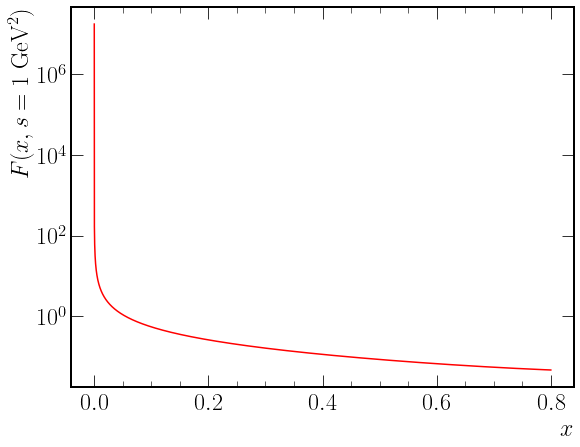

In [5]:
# Kernel plot
f, ax = plt.subplots(figsize=(9, 7))
fontsize = 24
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.plot(vx, vy, 'r-', zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$x$', fontsize=fontsize)
ax.set_ylabel(r'$F(x, s=1\;{\rm GeV}^2)$', fontsize=fontsize)

## Convolution of the $e^+e^-\rightarrow\eta\pi^+\pi^-$ cross section with the krenel $F(x, s)$
This section demonstrates the convolution of the $e^+e^-\rightarrow\eta\pi^+\pi^-$ Born cross section (VMD, $\rho,\rho^{\prime}\rightarrow\eta\rho$) with the kernel function $F(x, s)$.

In [6]:
# Opening the file containing the model cross section
fl = TFile.Open('born_cs_etapipi_simple_model.root', 'read')
# Extractin the model cross section
rfcn = fl.Get('f_bcs')
# Threshold energy square
s_t = 0.827
# Number of points used to plot cross sections
Npt = 1000
# Vector of center-of-mass energy values
vecm = np.linspace(1.18, 2., Npt)
# The Born cross section function
fbcs = lambda ecm: rfcn.Eval(ecm)
# Vector of Born cross section values
vbcs = np.vectorize(fbcs)(vecm)
# Vector of visible cross section values
vvcs = np.vectorize(lambda ecm: convolutionKuraevFadin(ecm, fbcs, 0, 1 - s_t / ecm / ecm))(vecm)
# Closing the file
fl.Close()

Text(0, 1, 'cross section (nb)')

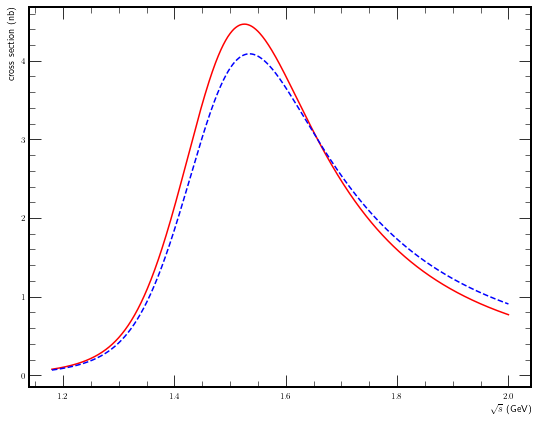

In [7]:
# Cross section plot
f, ax = plt.subplots(figsize=(9, 7))
ax.plot(vecm, vbcs, 'r-', label='Model Born cross section', zorder=0)
ax.plot(vecm, vvcs, 'b--', label='Model visible cross section', zorder=1)
ax.set_xlabel(r'$\sqrt{s}$ (GeV)', fontsize=fontsize)
ax.set_ylabel('cross section (nb)', fo)
ax.legend(fontsize=fontsize)